In [159]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def get_att_and_com_names(filepath):
    
    with open(f"{filepath}", "r") as f:
        examples = [json.loads(l) for l in f]
        normalized_attention_list = []
        component_names = examples[0]["Components"]
        for item in examples:
            normalized_attention_list.append(item["avg_attn_per_comp"])

    avg_normalized_attention = [sum(pair)/len(normalized_attention_list) for pair in zip(*normalized_attention_list)]
    
    return avg_normalized_attention, component_names

def get_att_and_com_names_list(set_files):

    avg_normalized_attention_list = []
    components_name_list = []
    
    for file in set_files: # set 1 plots
        avg_normalized_attention, component_names = get_att_and_com_names(file)

        positions_to_insert_1 = []
        if "inline_instr_in_0_demo" in file:
            positions_to_insert_1 = [3, 8, 13, 18]
        elif "inline_instr_in_1_demo" in file:
            positions_to_insert_1 = [8, 13, 18]

        for pos in positions_to_insert_1:
            avg_normalized_attention.insert(pos, 0)
            component_names.insert(pos, "inline")


        avg_normalized_attention_list.append(avg_normalized_attention)
        components_name_list.append(component_names)

    return avg_normalized_attention_list, components_name_list

def make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True):

    avg_normalized_attention_list, components_name_list = get_att_and_com_names_list(filepath_list)

    num_files = len(avg_normalized_attention_list)

    # Create a figure with 3 subplots stacked vertically
    fig, axes = plt.subplots(nrows=len(avg_normalized_attention_list), sharex=shared_axis, gridspec_kw={'hspace': 0.1})

    # Loop through the data and create heatmaps with different colormaps for each component
    for i in range(num_files):

        attentions = avg_normalized_attention_list[i]
        component_names = components_name_list[i]
        component_names = [item.replace("\n\n", "sep") for item in component_names]
        component_names = [item.replace("_", " ") for item in component_names]
        component_names = [item.replace(".", "period") for item in component_names]
        component_names = [item.replace("test", "Test") for item in component_names]

        # # Filter out components with "\n\n" in their names and corresponding attention values
        # attentions = [att for att, comp in zip(data, component_names) if "sep" not in comp]
        # component_names = [comp for comp in component_names if "sep" not in comp]
        percentages = [num * 100 for num in attentions]

        # Assign variable figsize to each subplot
        # fig.set_size_inches(15, 1.3)
        fig.set_size_inches(15, 1.7)
        heatmap = axes[i].imshow([percentages], cmap=color_map, aspect='auto')

        # Customize y-axis labels
        axes[i].set_yticks([0])
        axes[i].set_yticklabels([f'{corruptions_list[i]}'])

        # Customize x-axis labels
        axes[i].set_xticks(np.arange(len(component_names)))
        axes[i].set_xticklabels(component_names, rotation=60)

        #Add percentage values within the heatmap cells
        for j in range(len(component_names)):
            if percentages[j] > 5 or percentages[j] == 0 :  # Use dark text for light backgrounds
                text_color = 'black'
            else:  # Use light text for dark backgrounds
                text_color = 'white'
            axes[i].text(j, 0, f'{percentages[j]:.1f}', ha='center', va='center', color=text_color)

    # Add a single colorbar for the entire image
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=color_map), ax=axes.ravel().tolist(), orientation='vertical')
    # cbar.set_label('Percentage')

    plt.savefig(save_path, format='pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

# GPT-J-6B plots

In [176]:
# # set 1 meaningful versus random instr
filepath11 = "collect_results/gptj_results/gpt-j-6b_all_instr_n_demo_correct_predicting.jsonl"
filepath12 = "collect_results/gptj_results/gpt-j-6b_instr_randomwords_correct_predicting.jsonl"

# set 2 repeated text corruptions for meaningul case and random case
filepath21 = "collect_results/gptj_results/gpt-j-6b_inline_instr_in_0_demo_correct_predicting.jsonl" 
filepath22 = "collect_results/gptj_results/gpt-j-6b_inline_instr_in_1_demo_correct_predicting.jsonl"  
filepath23 = "collect_results/gptj_results/gpt-j-6b_randomwords_inline_instr_in_0_demo_incorrect_predicting.jsonl"  # incorrect preds
filepath24 = "collect_results/gptj_results/gpt-j-6b_randomwords_inline_instr_in_1_demo_correct_predicting.jsonl" 

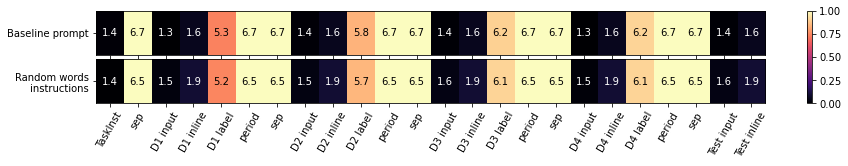

In [177]:
color_map = "magma"

# set 1
save_path = "collect_results/saved_plots_pdf/gptj_attn_set1.pdf"
# corruptions_list = ["Meaningul\ninstructions", "Random words\ninstructions", "Random words\nlabels"]
corruptions_list = ["Baseline prompt", "Random words\ninstructions"]
filepath_list = [filepath11, filepath12]
make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True)

print("figure 13")

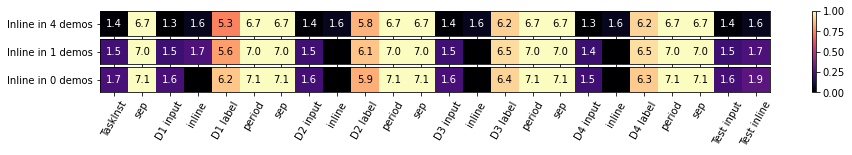

In [164]:
# set 2
save_path = "collect_results/saved_plots_pdf/gptj_attn_set2a.pdf"
corruptions_list =["Inline in 4 demos", "Inline in 1 demos", "Inline in 0 demos"]
filepath_list = [filepath11, filepath22, filepath21]
make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True)

print("figure 14")

# OPT-30B plots

In [167]:

# set 1 meaningful versus random instr
filepath11 = "collect_results/opt-30b_results/opt-30b_all_instr_n_demo_correct_predicting.jsonl"
filepath12 = "collect_results/opt-30b_results/opt-30b_instr_randomwords_correct_predicting.jsonl"
filepath13 = "collect_results/opt-30b_results/opt-30b_labels_randomwords_incorrect_predicting.jsonl" # incorrect preds

# set 2 repeated text corruptions for meaningul case and random case
filepath21 = "collect_results/opt-30b_results/opt-30b_inline_instr_in_0_demo_correct_predicting.jsonl" 
filepath22 = "collect_results/opt-30b_results/opt-30b_inline_instr_in_1_demo_correct_predicting.jsonl"  
filepath23 = "collect_results/opt-30b_results/opt-30b_randomwords_inline_instr_in_0_demo_incorrect_predicting.jsonl"  # incorrect preds
filepath24 = "collect_results/opt-30b_results/opt-30b_randomwords_inline_instr_in_1_demo_correct_predicting.jsonl" 

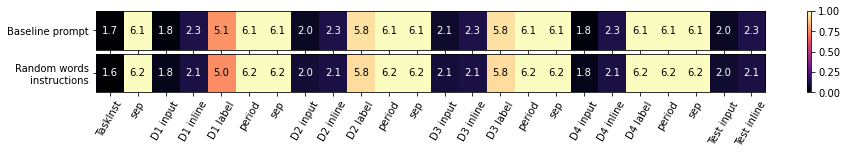

In [168]:
color_map = "magma"

save_path = "collect_results/saved_plots_pdf/opt30b_attn_set1.pdf"
# set 1
# corruptions_list = ["Meaningul\ninstructions", "Random words\ninstructions", "Random words\nlabels"]
# filepath_list = [filepath11, filepath12, filepath13]
corruptions_list = ["Baseline prompt", "Random words\ninstructions"]
filepath_list = [filepath11, filepath12]
make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True)

print("figure 12")

## set 2

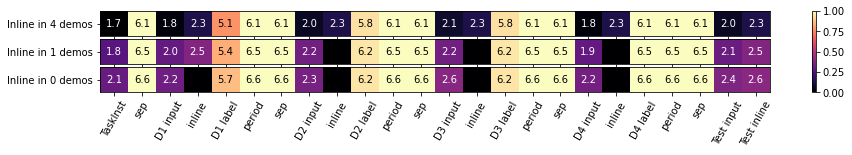

In [169]:
# set 2
save_path = "collect_results/saved_plots_pdf/opt30b_attn_set2a.pdf"
corruptions_list = ["Inline in 4 demos", "Inline in 1 demos", "Inline in 0 demos"]
filepath_list = [filepath11, filepath22, filepath21]
make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True)

print("figure 11")

# COMBINED PLOTS

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def get_att_and_com_names(filepath):
    
    with open(f"{filepath}", "r") as f:
        examples = [json.loads(l) for l in f]
        normalized_attention_list = []
        component_names = examples[0]["Components"]
        for item in examples:
            normalized_attention_list.append(item["avg_attn_per_comp"])

    avg_normalized_attention = [sum(pair)/len(normalized_attention_list) for pair in zip(*normalized_attention_list)]
    
    return avg_normalized_attention, component_names

def get_att_and_com_names_list(set_files):

    avg_normalized_attention_list = []
    components_name_list = []
    
    for file in set_files: # set 1 plots
        avg_normalized_attention, component_names = get_att_and_com_names(file)
        avg_normalized_attention_list.append(avg_normalized_attention)
        components_name_list.append(component_names)

    return avg_normalized_attention_list, components_name_list

def make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True):

    avg_normalized_attention_list, components_name_list = get_att_and_com_names_list(filepath_list)

    num_files = len(avg_normalized_attention_list)

    # Create a figure with 3 subplots stacked vertically
    fig, axes = plt.subplots(nrows=len(avg_normalized_attention_list), sharex=shared_axis, gridspec_kw={'hspace': 0.1})

    # Loop through the data and create heatmaps with different colormaps for each component
    for i in range(num_files):

        attentions = avg_normalized_attention_list[i]
        component_names = components_name_list[i]
        component_names = [item.replace("\n\n", "sep") for item in component_names]
        component_names = [item.replace("_", " ") for item in component_names]
        component_names = [item.replace(".", "period") for item in component_names]
        component_names = [item.replace("test", "Test") for item in component_names]

        # # Filter out components with "\n\n" in their names and corresponding attention values
        # attentions = [att for att, comp in zip(data, component_names) if "sep" not in comp]
        # component_names = [comp for comp in component_names if "sep" not in comp]

        percentages = [num * 100 for num in attentions]
        
        # Assign variable figsize to each subplot
        fig.set_size_inches(15, 1.3)
        heatmap = axes[i].imshow([percentages], cmap=color_map, aspect='auto')

        # Customize y-axis labels
        axes[i].set_yticks([0])
        axes[i].set_yticklabels([f'{corruptions_list[i]}'])

        # Customize x-axis labels
        axes[i].set_xticks(np.arange(len(component_names)))
        axes[i].set_xticklabels(component_names, rotation=60)


        # Add percentage values within the heatmap cells
        for j in range(len(component_names)):
            if percentages[j] > 5:  # Use dark text for light backgrounds
                text_color = 'black'
            else:  # Use light text for dark backgrounds
                text_color = 'white'
            axes[i].text(j, 0, f'{percentages[j]:.1f}', ha='center', va='center', color=text_color)

    # Add a single colorbar for the entire image
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=color_map), ax=axes.ravel().tolist(), orientation='vertical')
    # cbar.set_label('Percentage')

    plt.savefig(save_path, format='pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

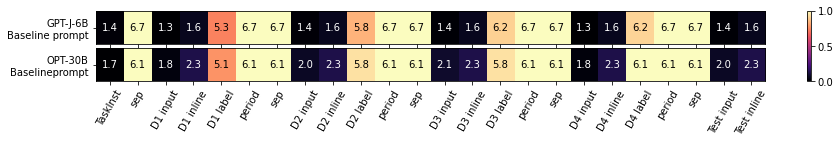

In [173]:
color_map = "magma"

save_path = "collect_results/saved_plots_pdf/bothmodels_attn_set1.pdf"

filepath111 = "collect_results/gptj_results/gpt-j-6b_all_instr_n_demo_correct_predicting.jsonl"
filepath112 = "collect_results/opt-30b_results/opt-30b_all_instr_n_demo_correct_predicting.jsonl"

# set 1
# corruptions_list = ["Meaningul\ninstructions", "Random words\ninstructions", "Random words\nlabels"]
# filepath_list = [filepath11, filepath12, filepath13]
corruptions_list = ["GPT-J-6B\nBaseline prompt", "OPT-30B\nBaselineprompt"]
filepath_list = [filepath111, filepath112]
make_plots(filepath_list, corruptions_list, color_map, save_path, shared_axis=True)

print("figure 6")